In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

## Inspect Data

In [2]:
df = pd.read_csv("dataset/Strategic_Growth_Insights2 (1).csv")
df.head()

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,campaign_id,ad_platform,ad_type,...,user_age,age_group,country,location,interests,name,start_date,end_date,duration_days,total_budget
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,9,Facebook,Stories,...,24,18-24,United States,West Shawna,"gaming, food",Campaign_9_Launch,2025-05-25,2025-07-13,49,40094.07
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,26,Instagram,Carousel,...,30,25-34,United States,Meyersland,"photography, finance",Campaign_26_Winter,2025-04-01,2025-06-17,77,44538.87
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,10,Instagram,Carousel,...,20,18-24,United States,Barrerahaven,"fashion, sports, travel",Campaign_10_Winter,2025-05-17,2025-07-21,65,19669.27
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression,14,Instagram,Image,...,18,18-24,United States,Lake Angelaland,"food, art",Campaign_14_Summer,2025-04-15,2025-06-04,50,39849.94
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression,2,Instagram,Stories,...,58,55-65,United Kingdom,Robinsonberg,"finance, lifestyle",Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41


In [3]:
df.columns

Index(['event_id', 'ad_id', 'user_id', 'timestamp', 'day_of_week',
       'time_of_day', 'event_type', 'campaign_id', 'ad_platform', 'ad_type',
       'target_gender', 'target_age_group', 'target_interests', 'user_gender',
       'user_age', 'age_group', 'country', 'location', 'interests', 'name',
       'start_date', 'end_date', 'duration_days', 'total_budget'],
      dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   event_id           100000 non-null  int64         
 1   ad_id              100000 non-null  int64         
 2   user_id            100000 non-null  object        
 3   timestamp          100000 non-null  datetime64[ns]
 4   day_of_week        100000 non-null  object        
 5   time_of_day        100000 non-null  object        
 6   event_type         100000 non-null  object        
 7   campaign_id        100000 non-null  int64         
 8   ad_platform        100000 non-null  object        
 9   ad_type            100000 non-null  object        
 10  target_gender      100000 non-null  object        
 11  target_age_group   100000 non-null  object        
 12  target_interests   100000 non-null  object        
 13  user_gender        100000 non-null  object   

In [5]:
#Konversi kolom waktu
df['start_date'] = pd.to_datetime(df['start_date'], format='%Y-%m-%d')
df['end_date'] = pd.to_datetime(df['end_date'], format='%Y-%m-%d')
df['timestamp'] = pd.to_datetime(df['timestamp'])

df.head()

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,campaign_id,ad_platform,ad_type,...,user_age,age_group,country,location,interests,name,start_date,end_date,duration_days,total_budget
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,9,Facebook,Stories,...,24,18-24,United States,West Shawna,"gaming, food",Campaign_9_Launch,2025-05-25,2025-07-13,49,40094.07
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,26,Instagram,Carousel,...,30,25-34,United States,Meyersland,"photography, finance",Campaign_26_Winter,2025-04-01,2025-06-17,77,44538.87
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,10,Instagram,Carousel,...,20,18-24,United States,Barrerahaven,"fashion, sports, travel",Campaign_10_Winter,2025-05-17,2025-07-21,65,19669.27
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression,14,Instagram,Image,...,18,18-24,United States,Lake Angelaland,"food, art",Campaign_14_Summer,2025-04-15,2025-06-04,50,39849.94
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression,2,Instagram,Stories,...,58,55-65,United Kingdom,Robinsonberg,"finance, lifestyle",Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   event_id          100000 non-null  int64         
 1   ad_id             100000 non-null  int64         
 2   user_id           100000 non-null  object        
 3   timestamp         100000 non-null  datetime64[ns]
 4   day_of_week       100000 non-null  object        
 5   time_of_day       100000 non-null  object        
 6   event_type        100000 non-null  object        
 7   campaign_id       100000 non-null  int64         
 8   ad_platform       100000 non-null  object        
 9   ad_type           100000 non-null  object        
 10  target_gender     100000 non-null  object        
 11  target_age_group  100000 non-null  object        
 12  target_interests  100000 non-null  object        
 13  user_gender       100000 non-null  object        
 14  user_

In [7]:
numerik = df.select_dtypes(include = ["number"]).columns.tolist()
kategori = df.select_dtypes(exclude = ["number"]).columns.tolist()

df[numerik].head()

,event_id,ad_id,campaign_id,user_age,duration_days,total_budget
0,1,197,9,24,49,40094.07
1,2,51,26,30,77,44538.87
2,3,46,10,20,65,19669.27
3,4,166,14,18,50,39849.94
4,5,52,2,58,82,79342.41


In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.describe()

,event_id,ad_id,timestamp,campaign_id,user_age,start_date,end_date,duration_days,total_budget
count,100000.000000,100000.000000,100000,100000.000000,100000.00000,100000,100000,100000.000000,100000.000000
mean,49511.712020,100.495500,2025-06-22 04:04:24.621250048,25.121340,27.66688,2025-05-01 23:12:54.720000,2025-07-07 09:16:11.999999744,66.418950,51161.670095
min,1.000000,1.000000,2025-05-07 14:12:59,1.000000,16.00000,2025-02-13 00:00:00,2025-04-02 00:00:00,32.000000,7918.040000
25%,24740.750000,50.000000,2025-05-30 14:17:16.249999872,13.000000,21.00000,2025-04-01 00:00:00,2025-06-01 00:00:00,52.000000,28962.340000
50%,49511.500000,101.000000,2025-06-22 00:58:49,25.000000,27.00000,2025-04-24 00:00:00,2025-07-04 00:00:00,70.000000,48832.610000
75%,74276.250000,150.000000,2025-07-14 21:51:48.249999872,37.000000,32.00000,2025-06-04 00:00:00,2025-08-05 00:00:00,82.000000,71038.280000
max,99047.000000,200.000000,2025-08-06 14:11:30,50.000000,65.00000,2025-07-23 00:00:00,2025-10-12 00:00:00,90.000000,98904.660000
std,28593.758155,57.858811,NaN,13.671546,8.30493,NaN,NaN,16.762637,25503.679423


In [10]:
df.describe(include = 'object')

,user_id,day_of_week,time_of_day,event_type,ad_platform,ad_type,target_gender,target_age_group,target_interests,user_gender,age_group,country,location,interests,name
count,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000,100000
unique,9950,7,4,6,2,4,3,4,90,3,6,10,7706,1641,48
top,5bdf4,Wednesday,Afternoon,Impression,Facebook,Stories,Female,18-24,news,Male,25-34,United States,West Michael,fitness,Campaign_17_Launch
freq,62,14400,25178,84817,63530,31964,41489,27118,6048,55156,41397,29961,154,2805,4056


In [11]:
df.isna().sum()

event_id            0
ad_id               0
user_id             0
timestamp           0
day_of_week         0
time_of_day         0
event_type          0
campaign_id         0
ad_platform         0
ad_type             0
target_gender       0
target_age_group    0
target_interests    0
user_gender         0
user_age            0
age_group           0
country             0
location            0
interests           0
name                0
start_date          0
end_date            0
duration_days       0
total_budget        0
dtype: int64

In [12]:
#IQR
Q1 = df[numerik].quantile(0.25)
Q3 = df[numerik].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Filter baris outliner
df_outlier = df[((df[numerik] < lower_bound) | (df[numerik] > upper_bound)).any(axis=1)]
print('Data outlier: ', df_outlier.shape[0], 'baris')

Data outlier:  1995 baris


## Feature Engineering

Tujuan Feature Engineering 
- ⁠Time growth → daily/weekly/monthly rate
- Platform growth → platform yang lagi naik performanya

Tujuan analisis: 
- platform/interest mana yang lagi trending

In [15]:
df['date'] = df['timestamp'].dt.date
df['month'] = df['timestamp'].dt.month_name()
df.head()

,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,campaign_id,ad_platform,ad_type,...,country,location,interests,name,start_date,end_date,duration_days,total_budget,month,date
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,9,Facebook,Stories,...,United States,West Shawna,"gaming, food",Campaign_9_Launch,2025-05-25,2025-07-13,49,40094.07,July,2025-07-26
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,26,Instagram,Carousel,...,United States,Meyersland,"photography, finance",Campaign_26_Winter,2025-04-01,2025-06-17,77,44538.87,June,2025-06-15
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,10,Instagram,Carousel,...,United States,Barrerahaven,"fashion, sports, travel",Campaign_10_Winter,2025-05-17,2025-07-21,65,19669.27,June,2025-06-27
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression,14,Instagram,Image,...,United States,Lake Angelaland,"food, art",Campaign_14_Summer,2025-04-15,2025-06-04,50,39849.94,June,2025-06-05
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression,2,Instagram,Stories,...,United Kingdom,Robinsonberg,"finance, lifestyle",Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41,July,2025-07-22


In [16]:
## Untuk melihat platform growth
## "Pada hari ini, di platform ini, ada berapa total klik?"
## "Pada hari ini, di platform ini, ada berapa total impressions?"
## "Pada hari ini, di platform ini, ada berapa user unik?"

platform_daily = df.groupby(['ad_platform', 'date']).agg(
    daily_clicks=('event_type', lambda x: (x=='click').sum()),
    daily_impressions=('event_id', 'count'),
    daily_users=('user_id', 'nunique')
).reset_index()
df = df.merge(platform_daily, on=['ad_platform', 'date'], how='left')
print([col for col in df.columns if 'daily_' in col])
df.head()

['daily_clicks', 'daily_impressions', 'daily_users']


,event_id,ad_id,user_id,timestamp,day_of_week,time_of_day,event_type,campaign_id,ad_platform,ad_type,...,name,start_date,end_date,duration_days,total_budget,month,date,daily_clicks,daily_impressions,daily_users
0,1,197,2359b,2025-07-26 00:19:56,Saturday,Night,Like,9,Facebook,Stories,...,Campaign_9_Launch,2025-05-25,2025-07-13,49,40094.07,July,2025-07-26,0,715,679
1,2,51,f9c67,2025-06-15 08:28:07,Sunday,Morning,Share,26,Instagram,Carousel,...,Campaign_26_Winter,2025-04-01,2025-06-17,77,44538.87,June,2025-06-15,0,426,420
2,3,46,5b868,2025-06-27 00:40:02,Friday,Night,Impression,10,Instagram,Carousel,...,Campaign_10_Winter,2025-05-17,2025-07-21,65,19669.27,June,2025-06-27,0,422,411
3,4,166,3d440,2025-06-05 19:20:45,Thursday,Evening,Impression,14,Instagram,Image,...,Campaign_14_Summer,2025-04-15,2025-06-04,50,39849.94,June,2025-06-05,0,424,406
4,5,52,68f1a,2025-07-22 08:30:29,Tuesday,Morning,Impression,2,Instagram,Stories,...,Campaign_2_Launch,2025-04-16,2025-07-07,82,79342.41,July,2025-07-22,0,422,403


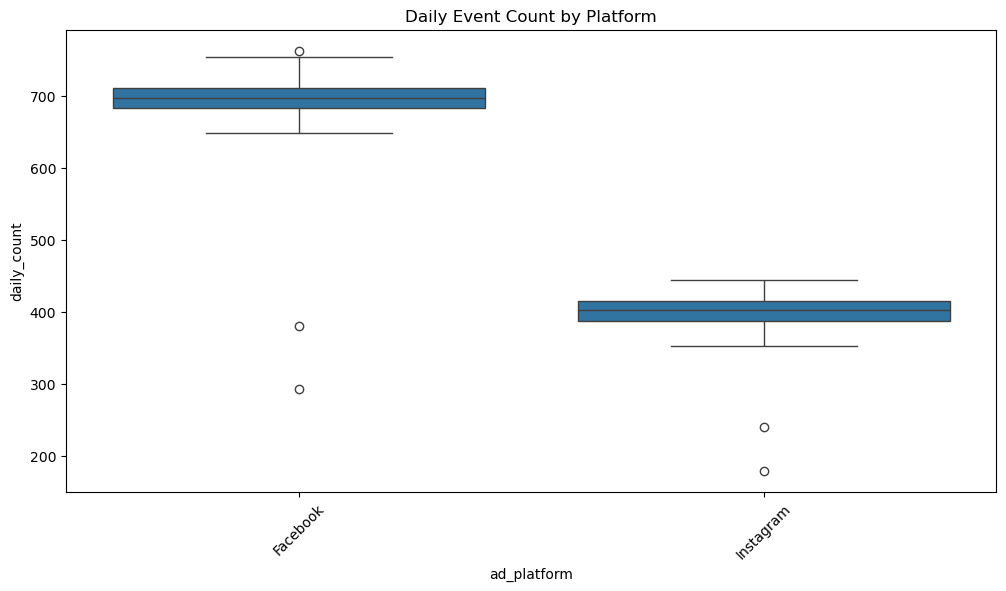

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

platform_daily_manual = df.groupby(['ad_platform', 'date']).size().reset_index(name='daily_count')

plt.figure(figsize=(12, 6))
sns.boxplot(data=platform_daily_manual, x='ad_platform', y='daily_count')
plt.title('Daily Event Count by Platform')
plt.xticks(rotation=45)
plt.show()

Tidak menghapus outlier -> Data tinggi mungkin campaign viral, Data rendah mungkin platform sedang trouble

In [18]:
df.to_csv("SGI_Cleaned.csv", index=False, encoding="utf-8")
print("File: SGI_Cleaned.csv")

File: SGI_Cleaned.csv
